# Import Libraries 

In [1]:
import numpy as np     
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score
 


In [2]:
#ALL ABOUT DATA
def Data_Details(DF, dataname):

    print("################################################\n"+dataname+ "DATA FRAME SHAPE:")
    print(DF.shape)
    print("################################################\n"+dataname+"DATA FRAME HEAD:")
    print(DF.head(10))
    print("################################################\n"+dataname+"DATA FRAME DESCRIBTION:")
    print(DF.describe())
    print("################################################\n"+dataname+"DATA FRAME INFO:")
    print(DF.info())
    print("################################################\n"+dataname+"DATA FRAME NULLS:")
    print(DF.isna().sum())  
    print("-------------------------------------------------\n")

# Reading Data


In [3]:
#Reading the data
dataframe = pd.read_csv("./train.csv")
train=dataframe.copy()


dataframe2 = pd.read_csv("./test.csv")
test=dataframe2.copy()

# Exploring Data

In [4]:
Data_Details(train,"Train")
Data_Details(test,"Test")


################################################
TrainDATA FRAME SHAPE:
(1460, 81)
################################################
TrainDATA FRAME HEAD:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... Po

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# Plotting 

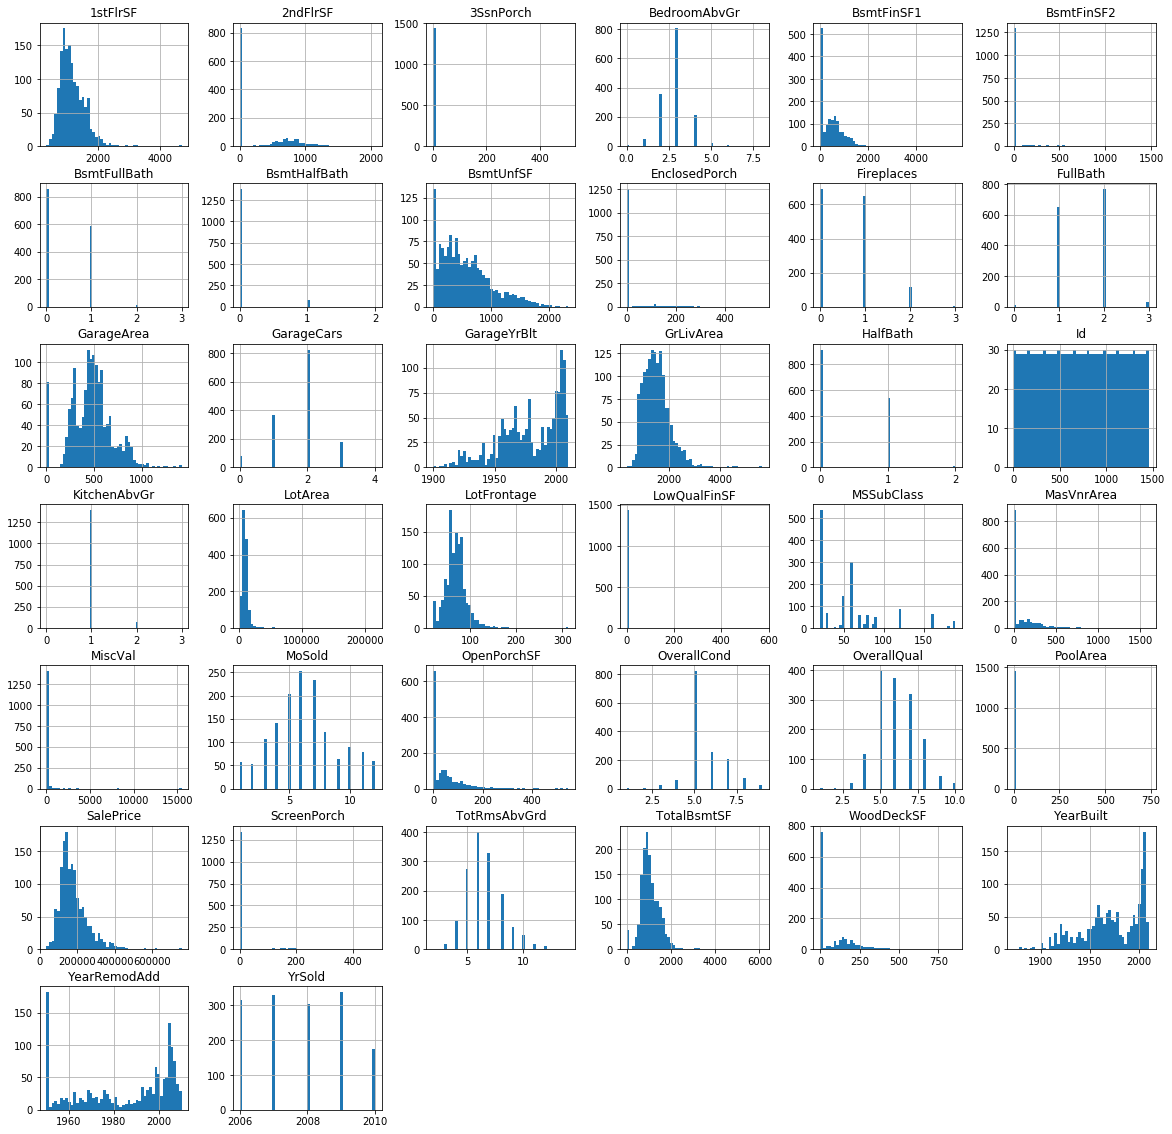

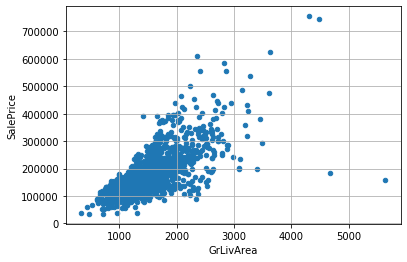

In [5]:
train.hist(bins=50, figsize=(20,20))
fig = train.plot(kind="scatter", x='GrLivArea', y='SalePrice', grid=True)
plt.show()

# Correlation

Text(0.5, 1, 'dataset correlation')

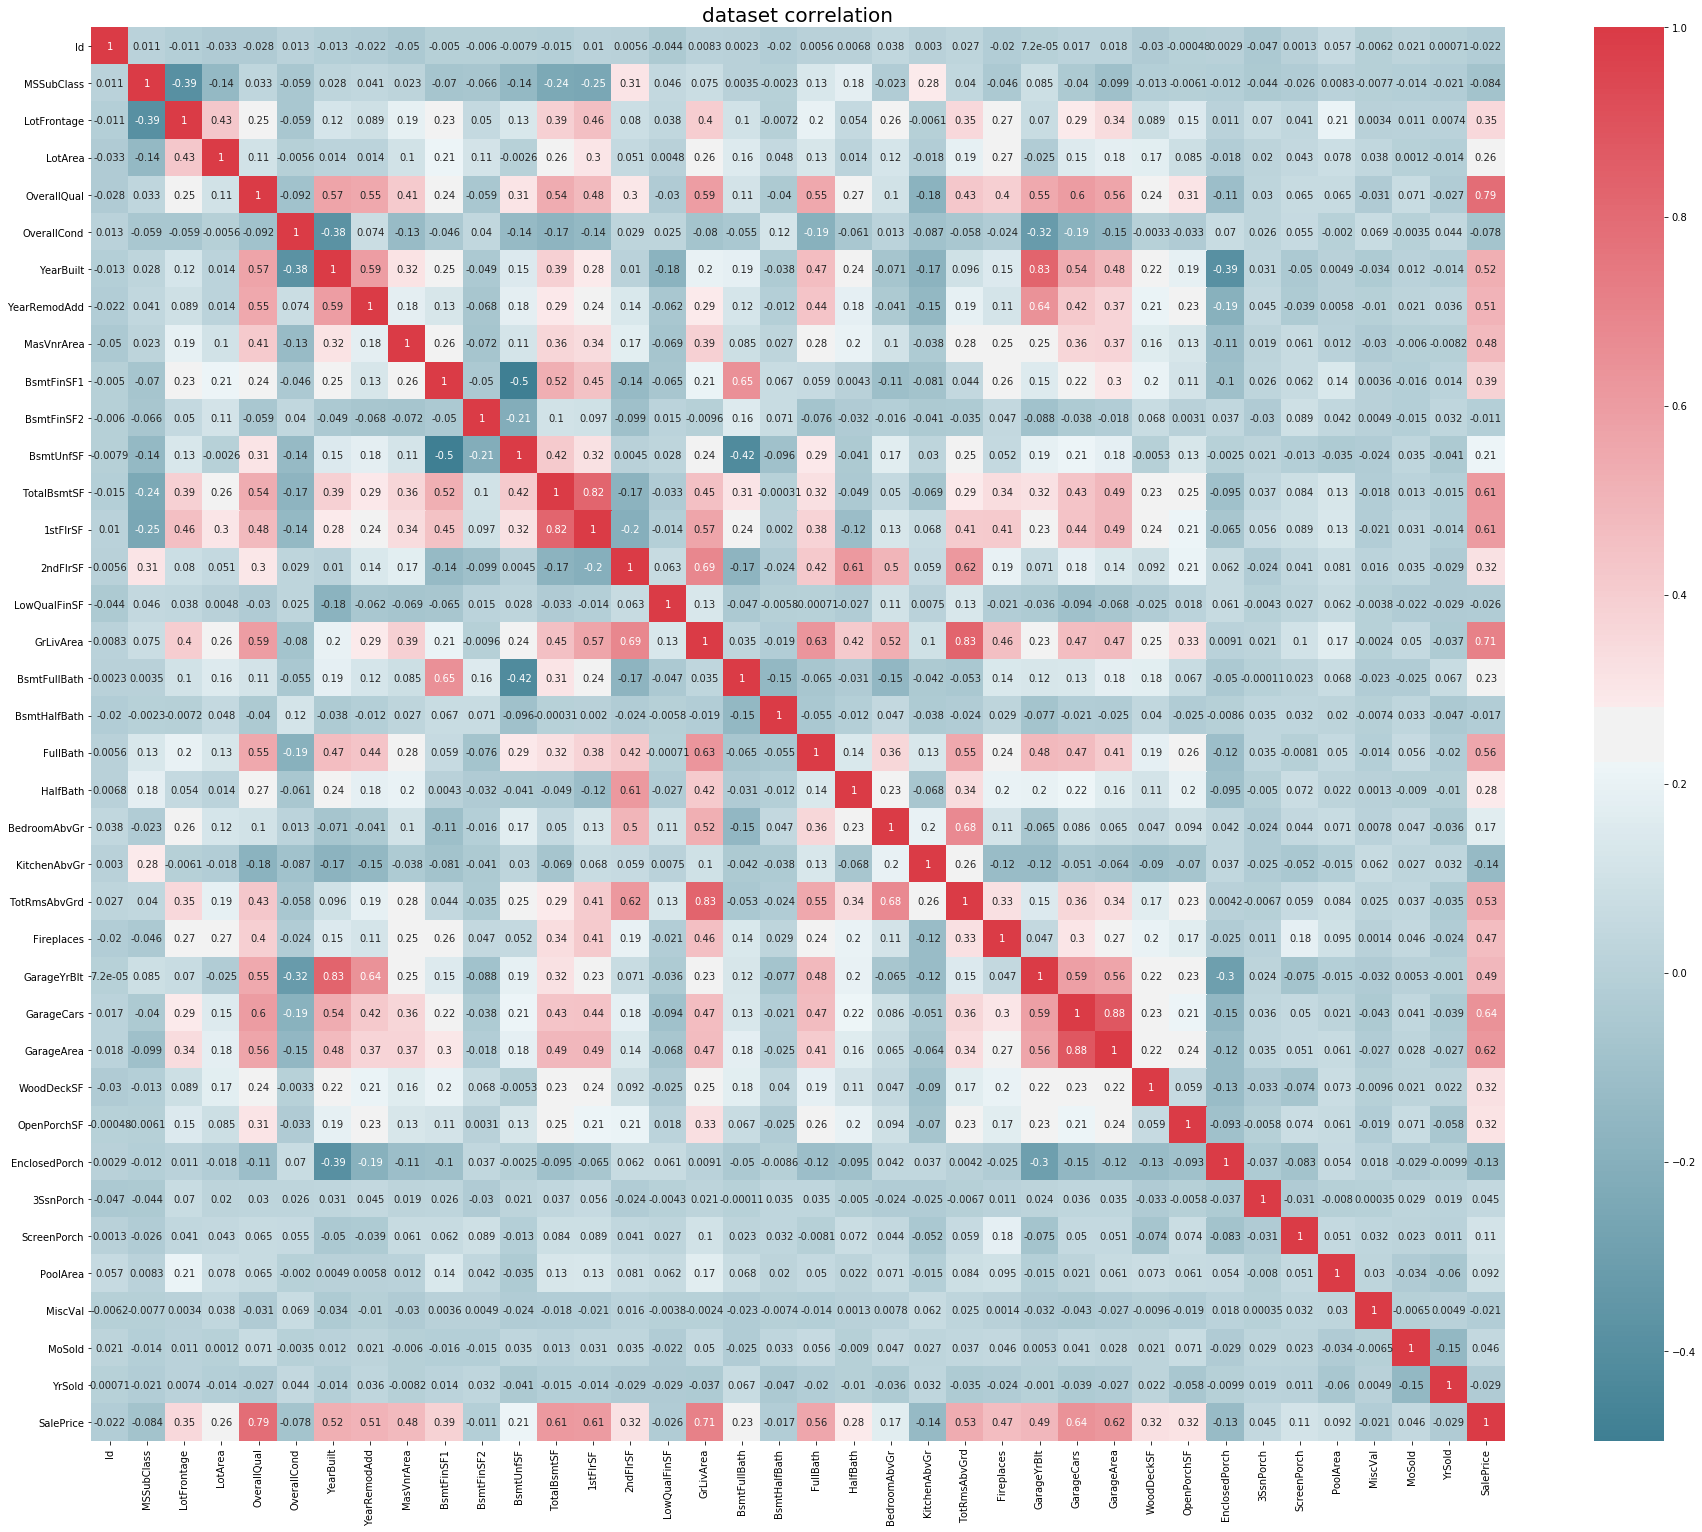

In [6]:
#Plotting the Correlation
f, ax = plt.subplots(figsize=(32, 26))
corr = train.corr()
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)
mp.set_title(label='dataset correlation', fontsize=20)

# Data PReprocessing 

In [7]:
# Exploring missing values
train_null=train.isna().sum()
train_null= train_null[train_null>0].sort_values(ascending=False)
print(train_null)
print('\n')
test_null=test.isna().sum()
test_null= test_null[test_null>0].sort_values(ascending=False) 
print(test_null)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         

In [8]:
#Dropping the columns that have too much null values or redendant 
train.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)


# differnationg between numerical and categorical columns 
numerical_features = [x for x in train._get_numeric_data().columns if x not in ['SalePrice']]
categorical_features = train.select_dtypes(include=['object']).columns.tolist()

#Filling missing values
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.mean()))
test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.mean()))

train['GarageYrBlt']=train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(),inplace=True)
test['GarageYrBlt']=test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean(),inplace=True)

train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mean(),inplace=True)
test['MasVnrArea']=test['MasVnrArea'].fillna(test['MasVnrArea'].mean(),inplace=True)


for column in numerical_features:
    train[column] = train[column].transform(lambda x: x.fillna(0))
    test[column] = test[column].transform(lambda x: x.fillna(0))


In [9]:
#ُEncoding categorical columns
data_onehot_train = pd.get_dummies(train, columns=categorical_features)
data_onehot_test = pd.get_dummies(test, columns=categorical_features)


# Splitting Data

In [10]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(data_onehot_train, test_size=0.2, random_state=42) 

X_train = train_df.drop(columns=['Id', 'SalePrice'])
y_train = train_df['SalePrice']

X_val = val_df.drop(columns=['Id', 'SalePrice'])
y_val = val_df['SalePrice']

X_test = test.drop(columns=['Id'])
y_train = train_df['SalePrice']


# Model 

In [11]:
l = LinearRegression()
l.fit(X_train, np.ravel(y_train))

print(l.score(X_val,y_val))


0.8843870250391788


In [12]:
l2 = LinearRegression()
l2.fit(X_train, np.ravel(y_train))

score= r2_score(y_val,l2.predict(X_val))
print("r2_score",score)

r2_score 0.8843870250391788
